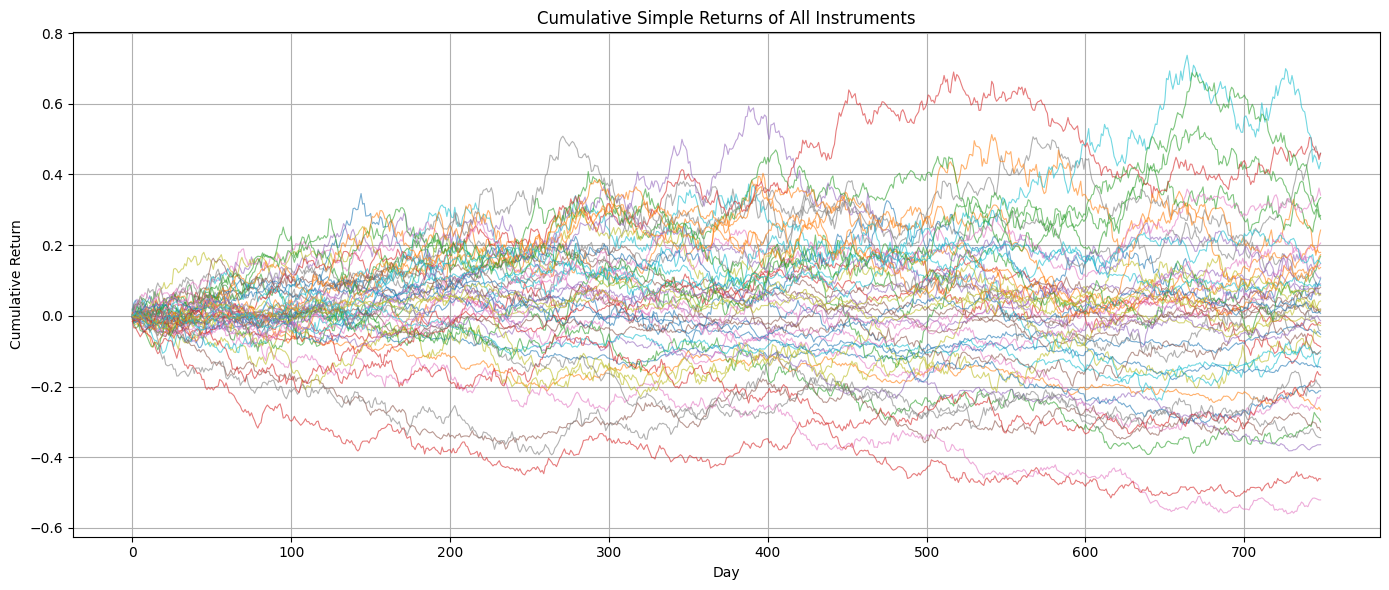

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

prices = np.loadtxt("prices.txt").T
simple_returns = prices[:, 1:] / prices[:, :-1] - 1
cumulative_returns = np.cumprod(1 + simple_returns, axis=1) - 1

plt.figure(figsize=(14, 6))
for i in range(cumulative_returns.shape[0]):
    plt.plot(cumulative_returns[i], alpha=0.6, linewidth=0.8, label=f'Inst {i}' if i < 5 else "")
plt.title("Cumulative Simple Returns of All Instruments")
plt.xlabel("Day")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.tight_layout()
plt.show()


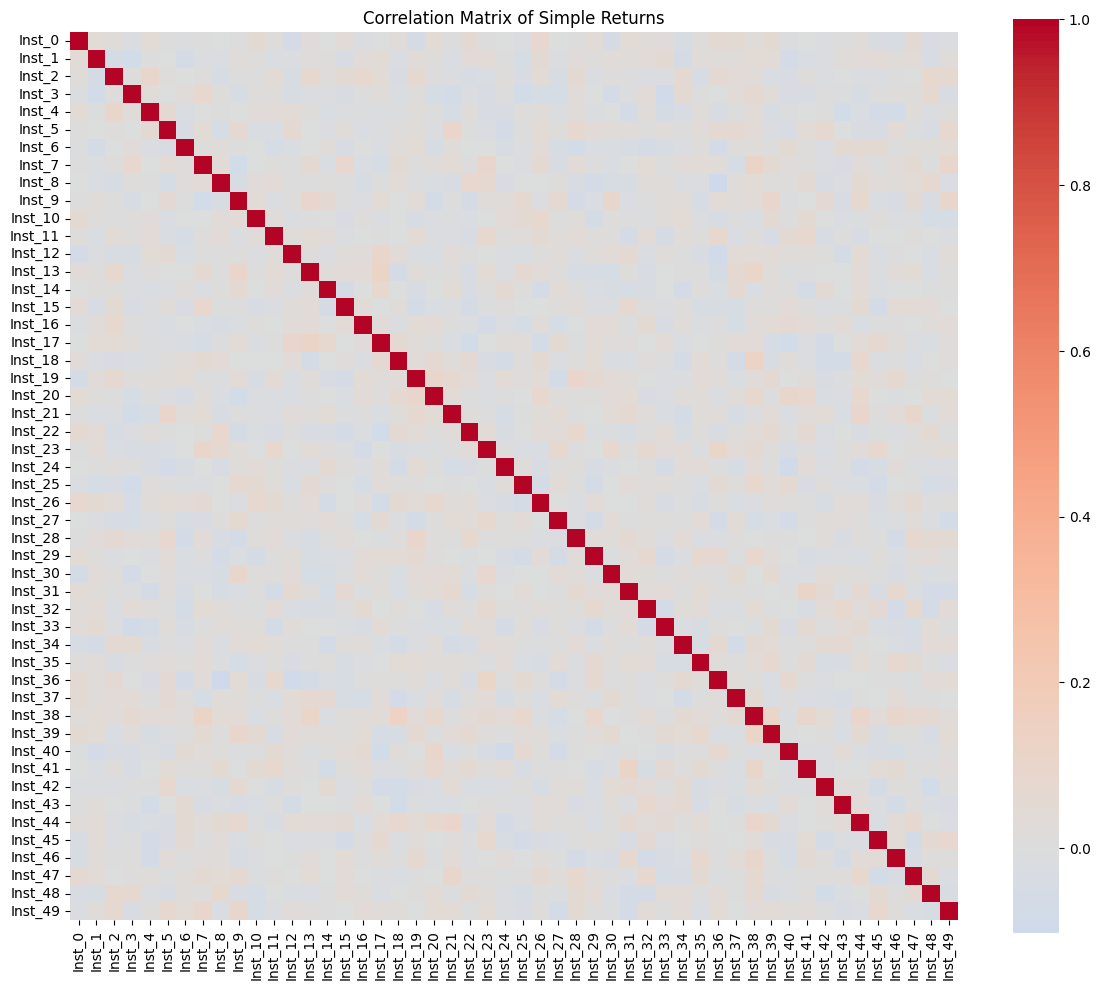

In [5]:
returns_df = pd.DataFrame(simple_returns.T, columns=[f'Inst_{i}' for i in range(simple_returns.shape[0])])
corr_matrix = returns_df.corr()

import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, square=True)
plt.title("Correlation Matrix of Simple Returns")
plt.tight_layout()
plt.show()


In [6]:
corr_pairs = []

for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):
        corr = corr_matrix.iloc[i, j]
        corr_pairs.append((corr, corr_matrix.index[i], corr_matrix.columns[j]))

top5 = sorted(corr_pairs, key=lambda x: x[0], reverse=True)[:5]

print("Top 5 Most Positively Correlated Instrument Pairs:")
for corr, i1, i2 in top5:
    print(f"{i1} & {i2}: correlation = {corr:.4f}")


Top 5 Most Positively Correlated Instrument Pairs:
Inst_18 & Inst_38: correlation = 0.1278
Inst_31 & Inst_41: correlation = 0.1170
Inst_7 & Inst_38: correlation = 0.1145
Inst_13 & Inst_17: correlation = 0.1104
Inst_23 & Inst_36: correlation = 0.1080


In [12]:
def lagcor(x):
    lag = x
    lagged_corrs = []
    seen_pairs = set()

    cum_returns_df = pd.DataFrame(cumulative_returns.T, columns=[f'Inst_{i}' for i in range(cumulative_returns.shape[0])])

    for i in range(cum_returns_df.shape[1]):
        for j in range(cum_returns_df.shape[1]):
            if i == j:
                continue
            key = tuple(sorted((i, j)))
            if key in seen_pairs:
                continue
            x = cum_returns_df.iloc[:-lag, i]
            y = cum_returns_df.iloc[lag:, j]
            corr = x.corr(y)
            seen_pairs.add(key)
            lagged_corrs.append((corr, f'Inst_{i}', f'Inst_{j}'))

    top5_lagged = sorted(lagged_corrs, key=lambda x: abs(x[0]), reverse=True)[:5]

    print(f"Top 5 Unique Lagged Correlations (lag = {lag} days):")
    for corr, i1, i2 in top5_lagged:
        print(f"{i1} (t) vs {i2} (t+{lag}): correlation = {corr:.4f}")

    return


In [13]:
for i in range(10):
    lagcor(i)

Top 5 Unique Lagged Correlations (lag = 0 days):
Inst_0 (t) vs Inst_1 (t+0): correlation = nan
Inst_0 (t) vs Inst_2 (t+0): correlation = nan
Inst_0 (t) vs Inst_3 (t+0): correlation = nan
Inst_0 (t) vs Inst_4 (t+0): correlation = nan
Inst_0 (t) vs Inst_5 (t+0): correlation = nan
Top 5 Unique Lagged Correlations (lag = 1 days):
Inst_2 (t) vs Inst_6 (t+1): correlation = 0.9383
Inst_4 (t) vs Inst_20 (t+1): correlation = 0.9268
Inst_2 (t) vs Inst_20 (t+1): correlation = 0.9188
Inst_4 (t) vs Inst_6 (t+1): correlation = 0.9179
Inst_1 (t) vs Inst_49 (t+1): correlation = -0.9073
Top 5 Unique Lagged Correlations (lag = 2 days):
Inst_2 (t) vs Inst_6 (t+2): correlation = 0.9383
Inst_4 (t) vs Inst_20 (t+2): correlation = 0.9272
Inst_2 (t) vs Inst_20 (t+2): correlation = 0.9192
Inst_4 (t) vs Inst_6 (t+2): correlation = 0.9178
Inst_1 (t) vs Inst_49 (t+2): correlation = -0.9078
Top 5 Unique Lagged Correlations (lag = 3 days):
Inst_2 (t) vs Inst_6 (t+3): correlation = 0.9384
Inst_4 (t) vs Inst_20 (t+3)